<a href="https://colab.research.google.com/github/ihebakermi10/iheb_portfolio/blob/main/Global_active_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,LSTM

In [159]:
data=pd.read_excel("/content/power.xlsx")
data.head()

,Unnamed: 0,datetime,Global_active_power
0,0,2006-12-16 17:00:00,152.024
1,1,2006-12-16 18:00:00,217.932
2,2,2006-12-16 19:00:00,204.014
3,3,2006-12-16 20:00:00,196.114
4,4,2006-12-16 21:00:00,183.388


In [179]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Diviser la colonne datetime en heures, minutes, jour, jour de la semaine et année
data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['year'] = data['datetime'].dt.year

# Séparer les données en fonction des caractéristiques et de la variable cible
X = data[['hour', 'month', 'day', 'year']]
y = data['Global_active_power']  # Suppression de la normalisation logarithmique

# Créer un objet MinMaxScaler pour X et y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Ajuster et transformer les données
# Normaliser les données
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_scaled = model.predict(X_test)

# Convertir les prédictions et les valeurs réelles en échelle originale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test)

# Évaluer les performances du modèle
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")



RMSE: 50.48688767901638


In [180]:
print("Values of X:")
print(X)

Values of X:
       hour  month  day  year
0        17     12   16  2006
1        18     12   16  2006
2        19     12   16  2006
3        20     12   16  2006
4        21     12   16  2006
...     ...    ...  ...   ...
34584    17     11   26  2010
34585    18     11   26  2010
34586    19     11   26  2010
34587    20     11   26  2010
34588    21     11   26  2010

[34589 rows x 4 columns]


In [181]:
print("Values of y:")
print(y)

Values of y:
0        152.024
1        217.932
2        204.014
3        196.114
4        183.388
          ...   
34584    103.554
34585     94.408
34586     99.560
34587     69.822
34588      2.804
Name: Global_active_power, Length: 34589, dtype: float64


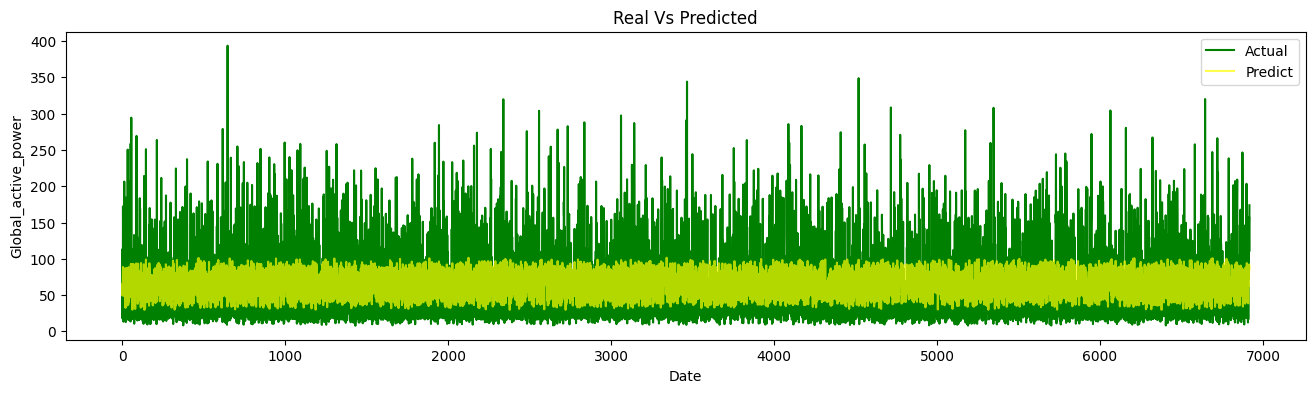

In [182]:


plt.figure(figsize=(16,4))
plt.plot(y_test, color='green',label='Actual')
plt.plot(y_pred, alpha=0.7, color='yellow',label='Predict')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()

In [170]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Séparer les données en fonction des caractéristiques et de la variable cible
data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['year'] = data['datetime'].dt.year

X = data[['hour', 'month', 'day', 'year']]
y = np.log1p(data['Global_active_power'])

# Créer un objet MinMaxScaler pour X et y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Ajuster et transformer les données
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Créer le modèle de réseau neuronal avec des ajustements
model = tf.keras.Sequential([
    tf.keras.layers.Dense(720, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)  # Change this to 1 because you have one target variable
])

# Compiler le modèle avec un taux d'apprentissage ajusté
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# Entraîner le modèle avec un nombre d'époques plus élevé
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Évaluer le modèle sur l'ensemble de test
loss = model.evaluate(X_test, y_test)
print(f'Loss sur l\'ensemble de test : {loss}')



Epoch 1/100
692/692 [==============================] - 17s 17ms/step - loss: 0.0421 - val_loss: 0.0241
Epoch 2/100
692/692 [==============================] - 11s 15ms/step - loss: 0.0249 - val_loss: 0.0234
Epoch 3/100
692/692 [==============================] - 11s 16ms/step - loss: 0.0248 - val_loss: 0.0225
Epoch 4/100
692/692 [==============================] - 11s 16ms/step - loss: 0.0242 - val_loss: 0.0218
Epoch 5/100
692/692 [==============================] - 11s 16ms/step - loss: 0.0243 - val_loss: 0.0235
Epoch 6/100
692/692 [==============================] - 11s 17ms/step - loss: 0.0242 - val_loss: 0.0231
Epoch 7/100
692/692 [==============================] - 11s 16ms/step - loss: 0.0244 - val_loss: 0.0229
Epoch 8/100
692/692 [==============================] - 10s 15ms/step - loss: 0.0245 - val_loss: 0.0232
Epoch 9/100
692/692 [==============================] - 11s 16ms/step - loss: 0.0243 - val_loss: 0.0225
Epoch 10/100
692/692 [==============================] - 11s 16ms/step - l

217/217 [==============================] - 1s 4ms/step


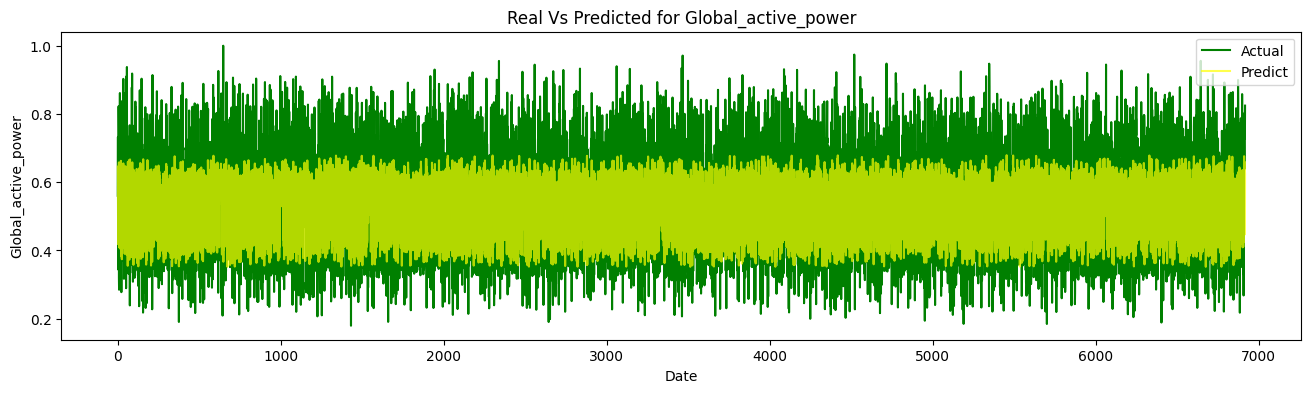

In [169]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Convertir y_test et y_pred en DataFrame pour faciliter l'accès aux colonnes
y_test_df = pd.DataFrame(y_test, columns=['Global_active_power'])
y_pred_df = pd.DataFrame(y_pred, columns=['Global_active_power'])

# Afficher les valeurs réelles et prédites
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.plot(y_test_df['Global_active_power'], color='green', label='Actual')
plt.plot(y_pred_df['Global_active_power'], alpha=0.7, color='yellow', label='Predict')
plt.title('Real Vs Predicted for Global_active_power')
plt.xlabel('Date')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()
